In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [224]:
weights_hidden = np.random.uniform(size=(2, 2), low=-1.0)
weights_outer = np.random.uniform(size=(2, 1), low=-1.0)
biases_hidden = np.random.uniform(size=(1,2), low=-1.0)
bias_outer = np.random.uniform(size=(1,1), low=-1.0)

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return ((np.exp(x) + np.exp(-x)) ** 2 - (np.exp(x) - np.exp(-x)) ** 2) / (np.exp(x) + np.exp(-x)) ** 2

In [234]:
class XOR:
    def __init__(self, train_data, target, activation_func, activation_func_derivative, lr=0.1, num_epochs=15_000, momentum_factor=0):
        self.output_final = None
        self.output = None
        self.hidden_out = None
        self.hidden = None

        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs
        self.momentum_factor = momentum_factor
        self.activation_func = activation_func
        self.activation_func_derivative = activation_func_derivative

        self.weights_hidden = weights_hidden.copy()
        self.weights_hidden_increment = 0
        self.weights_outer = weights_outer.copy()
        self.weights_outer_increment = 0

        self.biases_hidden = biases_hidden.copy()
        self.bias_outer = bias_outer.copy()

        self.grad_hidden = 0
        self.grad_outer = 0

        self.losses = []

    def backpropagate(self):
        loss = 0.5 * (self.target - self.output_final) ** 2
        self.losses.append(np.sum(loss))

        error_term = (self.target - self.output_final)

        self.grad_hidden = self.train_data.T @ (((error_term * self.activation_func_derivative(self.output_final)) * self.weights_outer.T) * self.activation_func_derivative(self.hidden_out))

        self.grad_outer = self.hidden_out.T @ (error_term * self.activation_func_derivative(self.output_final))

        weights_hidden_increment = self.lr * self.grad_hidden + self.momentum_factor * self.weights_hidden_increment
        self.weights_hidden += weights_hidden_increment
        self.weights_hidden_increment = weights_hidden_increment

        weights_outer_increment = self.lr * self.grad_outer + self.momentum_factor * self.weights_outer_increment
        self.weights_outer += weights_outer_increment
        self.weights_outer_increment = weights_outer_increment

        self.biases_hidden += np.sum(self.lr * ((error_term * self.activation_func_derivative(self.output_final)) * self.weights_outer.T) * self.activation_func_derivative(self.hidden_out), axis=0)
        self.bias_outer += np.sum(self.lr * error_term * self.activation_func_derivative(self.output_final), axis=0)

    def forward(self, batch):
        self.hidden = np.dot(batch, self.weights_hidden) + self.biases_hidden
        self.hidden_out = self.activation_func(self.hidden)

        self.output = np.dot(self.hidden_out, self.weights_outer) + self.bias_outer
        self.output_final = self.activation_func(self.output)

        return self.output_final

    def classify(self, input_values):
        input_values = np.transpose(input_values)
        if self.forward(input_values) >= 0.5:
            return 1

        return 0

    def train(self):
        for _ in range(self.num_epochs):
            predicts = self.forward(self.train_data)
            predicts_values = []
            for p in predicts:
                if p >= 0.5:
                    predicts_values.append(1)
                else:
                    predicts_values.append(0)
            if predicts_values == [0, 1, 1, 0]:
                break

            # loss = np.sum(0.5 * (self.target - self.output_final) ** 2)
            # if loss < 0.005:
            #     break
            self.backpropagate()

In [16]:
train_data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])

target = np.array(
    [
        [0],
        [1],
        [1],
        [0]])

In [135]:
losses = []
for i in np.arange(0, 5, 0.1):
    xor = XOR(train_data, target, activation_func=sigmoid, activation_func_derivative=sigmoid_derivative, lr=i, num_epochs=10_000)
    xor.train()
    losses.append(xor.losses[-1])

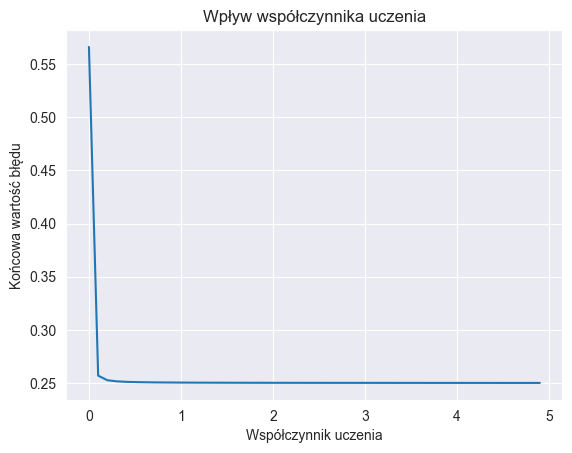

In [136]:
fig, ax = plt.subplots()
ax.plot(losses)
ax.set_xticks(range(0, len(losses) + 1, 10))
ax.set_xticklabels([0, 1, 2, 3, 4, 5])
ax.set_xlabel("Współczynnik uczenia")
ax.set_ylabel("Końcowa wartość błędu")
ax.set_title("Wpływ współczynnika uczenia")
plt.show()

In [176]:
losses_at_the_end = []
avg_losses = []
for i in np.arange(1, 30_002, 5000):
    xor = XOR(train_data, target, activation_func=sigmoid, activation_func_derivative=sigmoid_derivative, lr=0.01, num_epochs=i)
    xor.train()
    try:
        losses_at_the_end.append(xor.losses[-1])
        avg_losses.append(np.average(xor.losses))
    except:
        pass

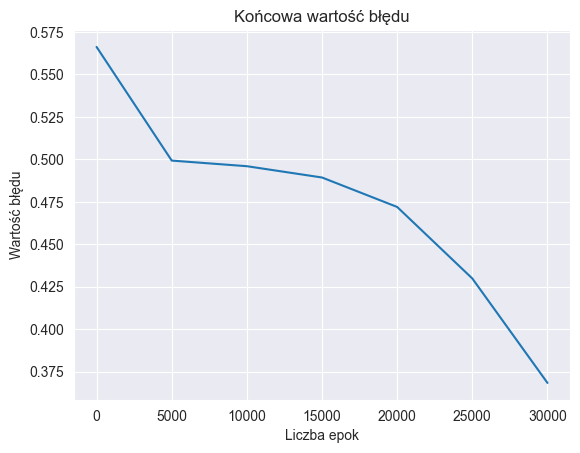

In [177]:
fig, ax = plt.subplots()
ax.plot(losses_at_the_end)
ax.set_xticks(range(0, 7))
ax.set_xticklabels([0, 5000, 10_000, 15_000, 20_000, 25_000, 30_000])
ax.set_xlabel("Liczba epok")
ax.set_ylabel("Wartość błędu")
ax.set_title("Końcowa wartość błędu")
plt.show()

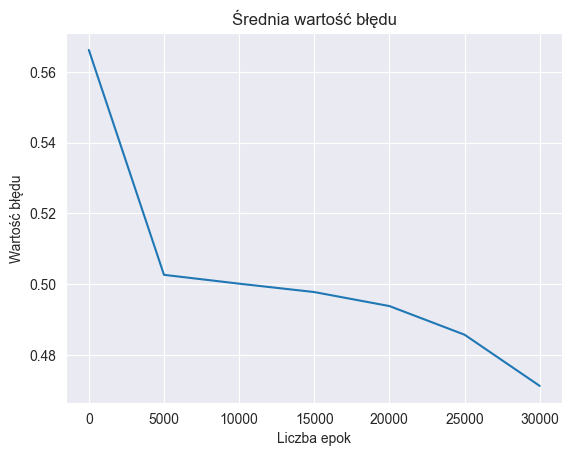

In [178]:
fig, ax = plt.subplots()
ax.plot(avg_losses)
ax.set_xticks(range(0, 7))
ax.set_xticklabels([0, 5000, 10_000, 15_000, 20_000, 25_000, 30_000])
ax.set_xlabel("Liczba epok")
ax.set_ylabel("Wartość błędu")
ax.set_title("Średnia wartość błędu")
plt.show()

In [179]:
xor = XOR(train_data, target, activation_func=sigmoid, activation_func_derivative=sigmoid_derivative, lr=0.01, num_epochs=15000, momentum_factor=0.0)
xor.train()

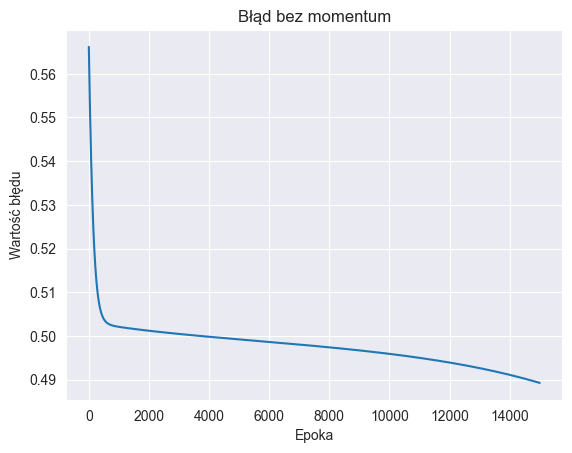

In [180]:
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd bez momentum")
plt.show()

In [181]:
xor = XOR(train_data, target, activation_func=sigmoid, activation_func_derivative=sigmoid_derivative, lr=0.01, num_epochs=15000, momentum_factor=0.5)
xor.train()

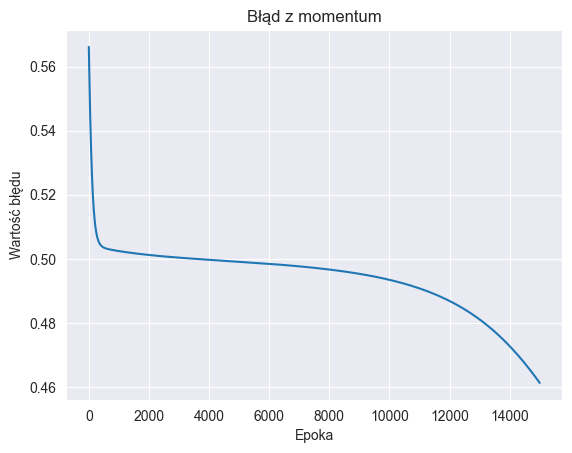

In [182]:
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z momentum")
plt.show()

In [195]:
xor = XOR(train_data, target, activation_func=sigmoid, activation_func_derivative=sigmoid_derivative, lr=0.01, num_epochs=15000, momentum_factor=1)
xor.train()

C:\Users\Kuba\AppData\Local\Temp\ipykernel_11420\2070425222.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


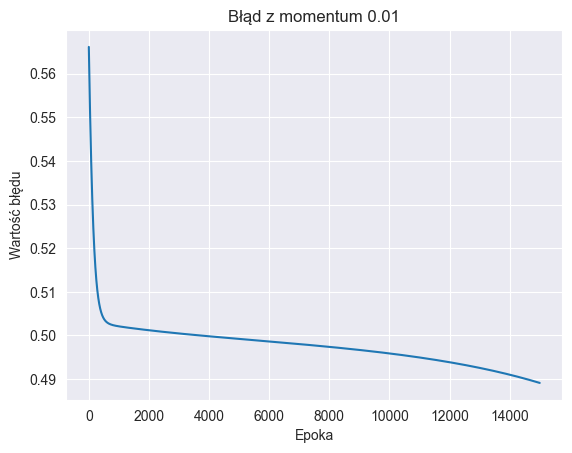

In [184]:
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z momentum 0.01")
plt.show()

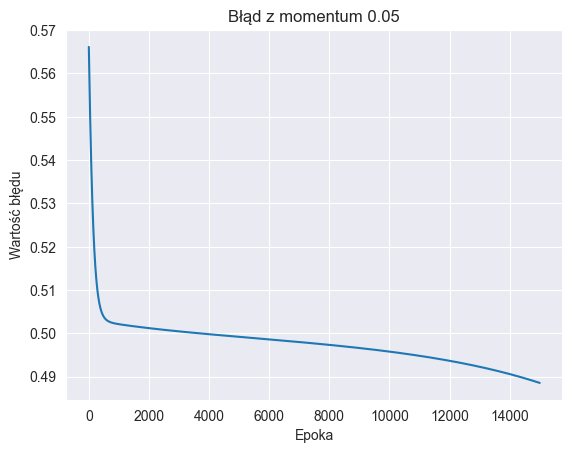

In [186]:
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z momentum 0.05")
plt.show()

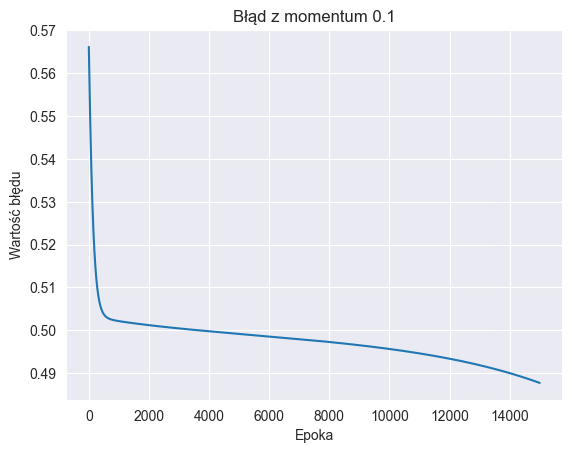

In [188]:
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z momentum 0.1")
plt.show()

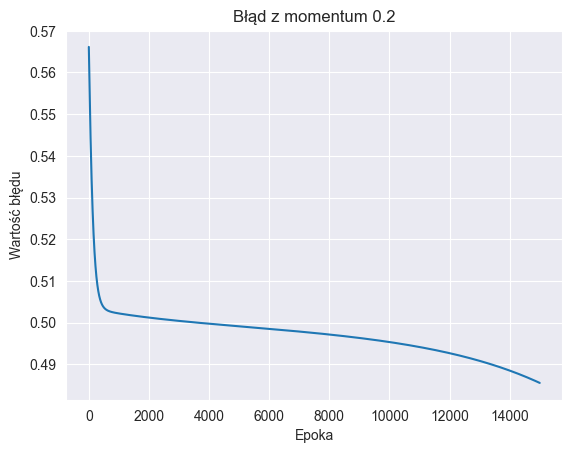

In [190]:
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z momentum 0.2")
plt.show()

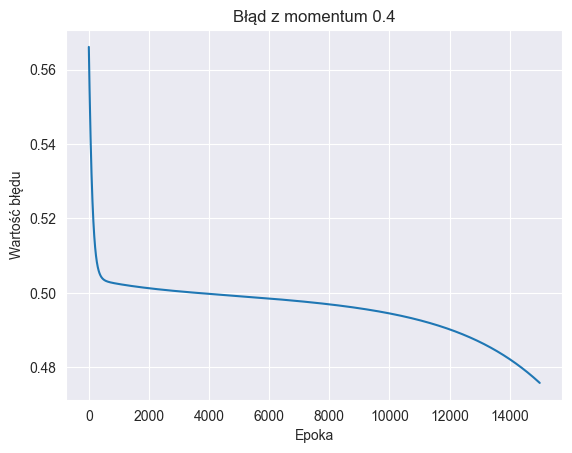

In [192]:
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z momentum 0.4")
plt.show()

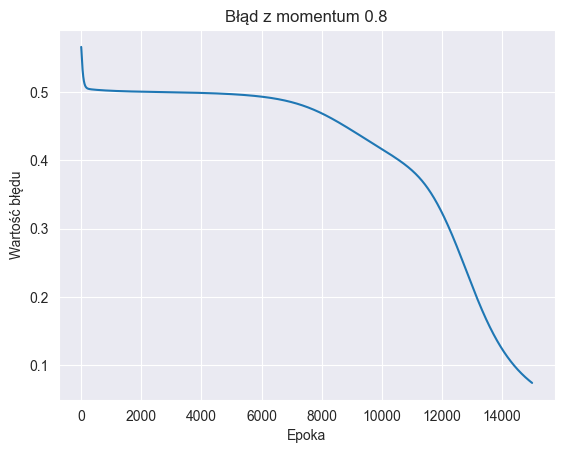

In [194]:
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z momentum 0.8")
plt.show()

In [198]:
xor = XOR(train_data, target, activation_func=sigmoid, activation_func_derivative=sigmoid_derivative, lr=0.01, num_epochs=15000, momentum_factor=0)
xor.train()

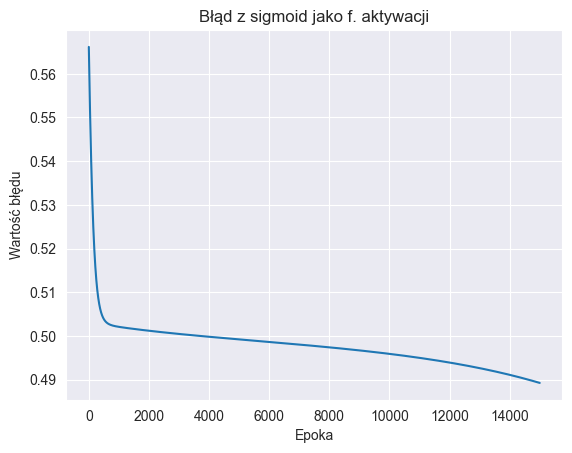

In [199]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z sigmoid jako f. aktywacji")
plt.show()

In [172]:
xor = XOR(train_data, target, activation_func=tanh, activation_func_derivative=tanh_derivative, lr=0.01, num_epochs=15000, momentum_factor=0)
xor.train()

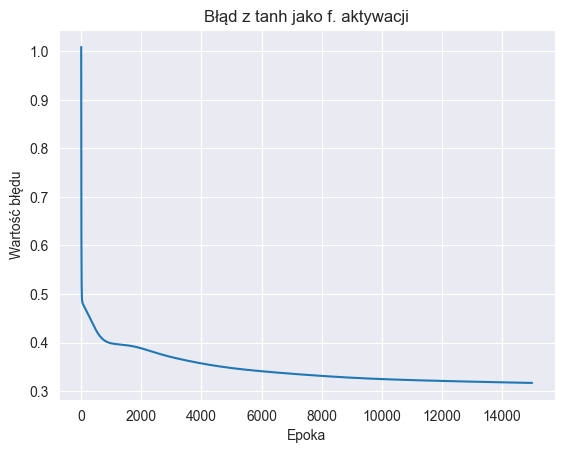

In [173]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z tanh jako f. aktywacji")
plt.show()

In [202]:
xor = XOR(train_data, target, activation_func=sigmoid, activation_func_derivative=sigmoid_derivative, lr=0.01, num_epochs=15000, momentum_factor=0.5)
xor.train()

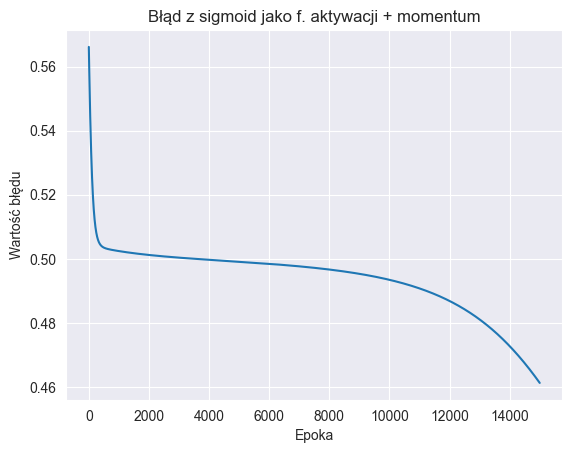

In [203]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z sigmoid jako f. aktywacji + momentum")
plt.show()

In [235]:
xor = XOR(train_data, target, activation_func=tanh, activation_func_derivative=tanh_derivative, lr=0.01, num_epochs=15000, momentum_factor=0.5)
xor.train()

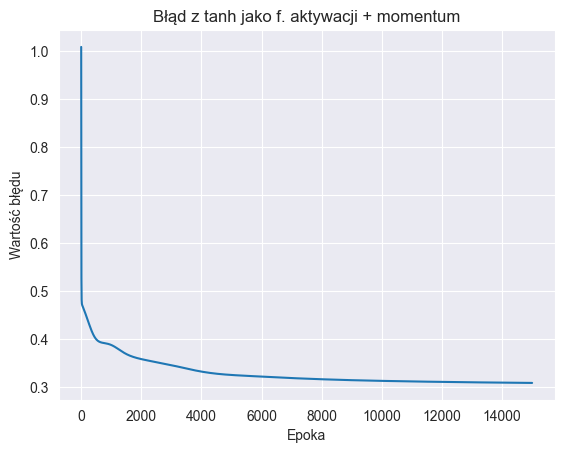

In [205]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z tanh jako f. aktywacji + momentum")
plt.show()

In [237]:
xor = XOR(train_data, target, activation_func=sigmoid, activation_func_derivative=sigmoid_derivative, lr=0.3, num_epochs=15000, momentum_factor=0)
xor.train()

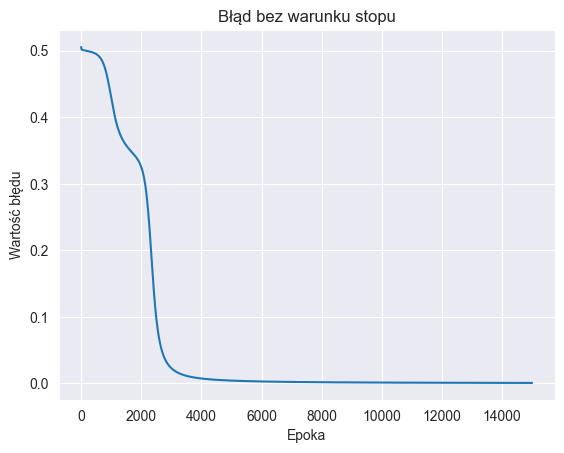

In [233]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd bez warunku stopu")
plt.show()

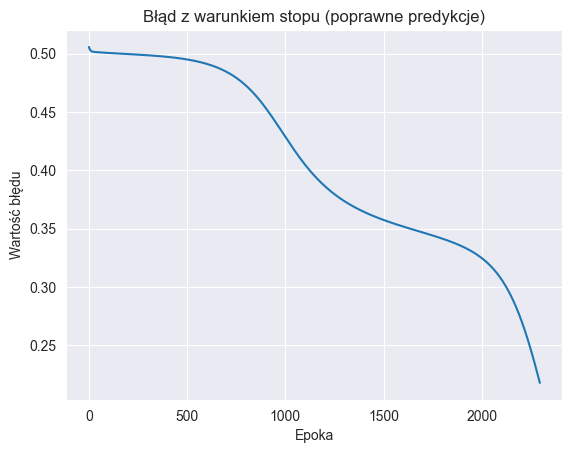

In [230]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z warunkiem stopu (poprawne predykcje)")
plt.show()

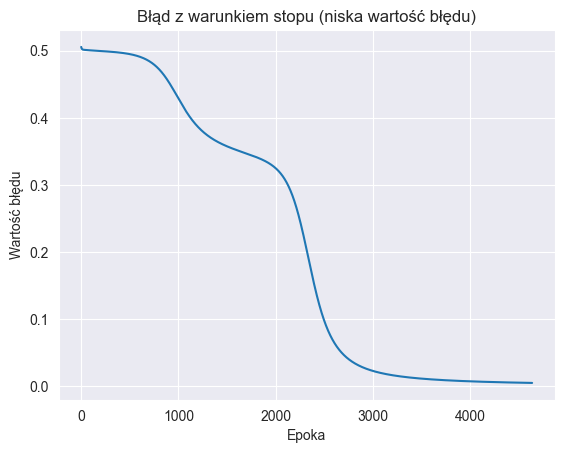

In [238]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title("Błąd z warunkiem stopu (niska wartość błędu)")
plt.show()

In [253]:
weights_hidden = np.random.uniform(size=(2, 2), low=-1.0)
weights_outer = np.random.uniform(size=(2, 1), low=-1.0)
biases_hidden = np.random.uniform(size=(1,2), low=-1.0)
bias_outer = np.random.uniform(size=(1,1), low=-1.0)
avg_weights_input = (np.average(weights_hidden) + np.average(weights_outer) + np.average(biases_hidden) + np.average(bias_outer)) / 4
xor = XOR(train_data, target, activation_func=sigmoid, activation_func_derivative=sigmoid_derivative, lr=0.3, num_epochs=15000, momentum_factor=0)
xor.train()

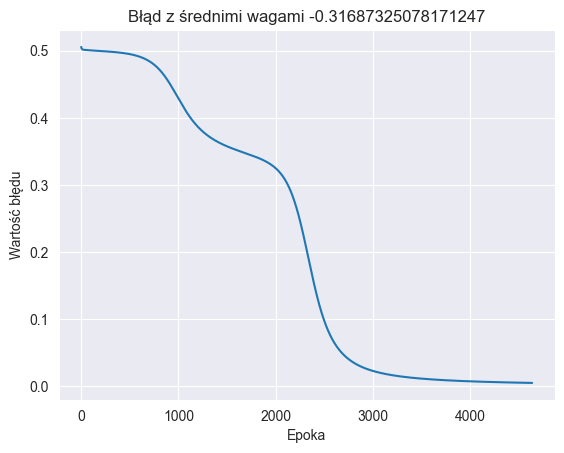

In [244]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title(f"Błąd z średnimi wagami {avg_weights_input}")
plt.show()

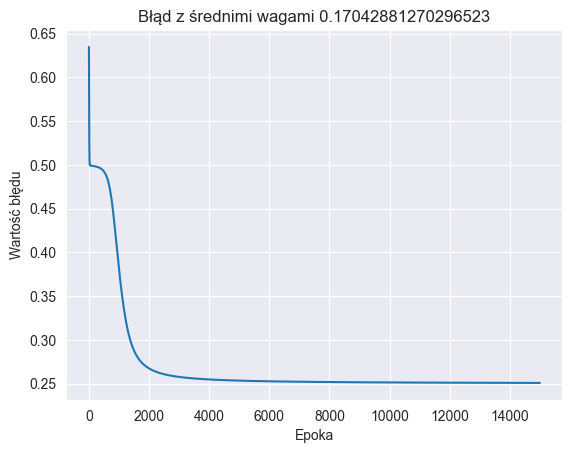

In [246]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title(f"Błąd z średnimi wagami {avg_weights_input}")
plt.show()

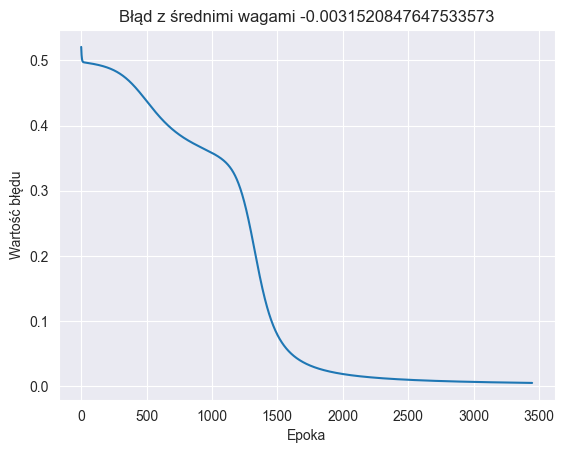

In [248]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title(f"Błąd z średnimi wagami {avg_weights_input}")
plt.show()

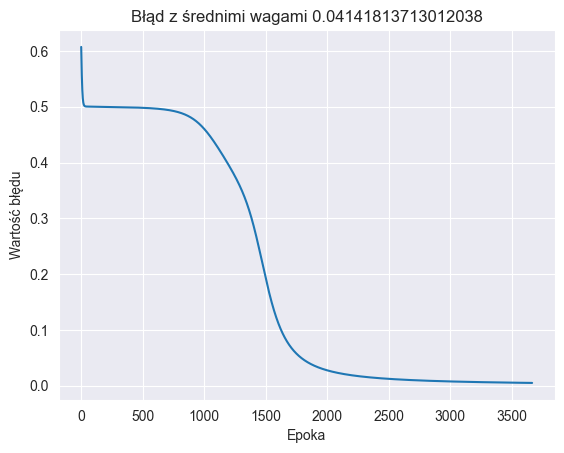

In [250]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title(f"Błąd z średnimi wagami {avg_weights_input}")
plt.show()

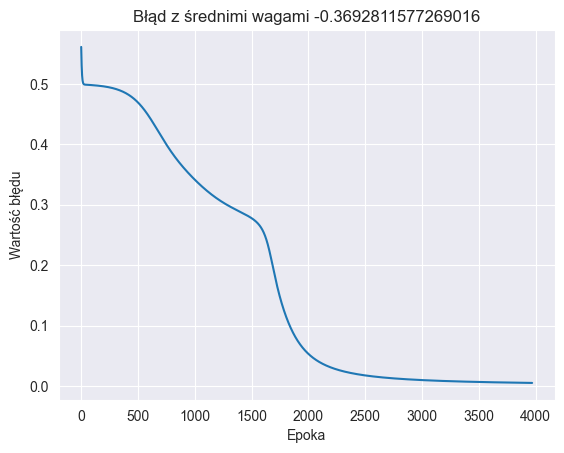

In [252]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title(f"Błąd z średnimi wagami {avg_weights_input}")
plt.show()

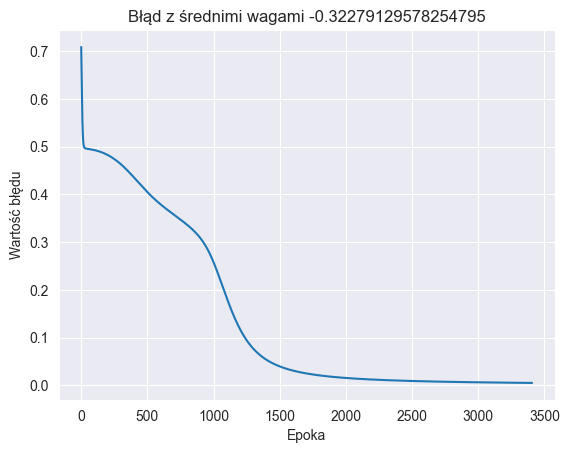

In [254]:
plt.show()
plt.plot(xor.losses)
plt.ylabel("Wartość błędu")
plt.xlabel("Epoka")
plt.title(f"Błąd z średnimi wagami {avg_weights_input}")
plt.show()